# Prediction of maximum power usage(max KWH) of a retail store on any given day.

### Data&Task Description

The given data is depicting the power usage(max KWH) of a retail store against various features(mostly climatic) across a the period of 2 years. 

The patterns of the data against various parameters need to be understood and to be used to build a model to predict the maximum usage(max kwh) on the unseen data i.e test data.

Train-Test Split:75-25

In [1]:
#Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#Importing the data to a data frame
energy_dt = pd.read_csv("C:/Users/IBM_ADMIN/Desktop/Accenture_assign/ModelData1.csv",header=0)
energy_dt.shape
energy_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 23 columns):
Row Labels              8215 non-null object
Hour                    8215 non-null int64
Date-Hour               8215 non-null object
Month                   8215 non-null int64
Year                    8215 non-null int64
Sum/Win                 8215 non-null int64
WeekNumber              8215 non-null int64
Weeday                  8215 non-null int64
Prior Period Temp C     8215 non-null int64
Avg Temp C              8215 non-null int64
Winter HDD (51 Base)    8215 non-null float64
Summer CDD (51 Base)    8215 non-null float64
Max Temp C              8215 non-null int64
Dew C                   8215 non-null int64
Humidity                8213 non-null float64
Visibility (km)         8213 non-null float64
Wind Dir                8215 non-null object
Wind Speed (km/h)       8214 non-null object
Gust Speed (km/h)       1547 non-null float64
Precip (mm)             149 non-null float6

### 1.Data Preprocessing

1) Filling the missing values if any                                                    
2) Converting the datatypes of the features if needed                              
3) Elimination or creation of new features.


In [119]:
energy_dt.isnull().sum()

Row Labels                 0
Hour                       0
Date-Hour                  0
Month                      0
Year                       0
Sum/Win                    0
WeekNumber                 0
Weeday                     0
Prior Period Temp C        0
Avg Temp C                 0
Winter HDD (51 Base)       0
Summer CDD (51 Base)       0
Max Temp C                 0
Dew C                      0
Humidity                   2
Visibility (km)            2
Wind Dir                   0
Wind Speed (km/h)          1
Gust Speed (km/h)       6668
Precip (mm)             8066
Events                  7766
Conditions                 0
Max kW                     0
dtype: int64

In [120]:
energy_dt[energy_dt["Visibility (km)"].isnull()]

,Row Labels,Hour,Date-Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,...,Dew C,Humidity,Visibility (km),Wind Dir,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Events,Conditions,Max kW
970,6/10/2014,15,6/10/2014-15,6,2014,1,24,2,18,19,...,18,94.0,NaN,ENE,16.7,NaN,NaN,NaN,Unknown,273
3293,10/7/2014,14,10/7/2014-14,10,2014,1,41,2,23,23,...,4,NaN,NaN,North,NaN,NaN,NaN,NaN,Unknown,321


In [121]:
energy_dt[energy_dt["Conditions"]=="Unknown"]['Visibility (km)'].mean()

16.00804597701144

In [122]:
energy_dt['Visibility (km)'].fillna(energy_dt[energy_dt["Conditions"]=="Unknown"]['Visibility (km)'].mean(),inplace=True)

In [123]:
energy_dt['Wind Speed (km/h)'].fillna(energy_dt['Wind Speed (km/h)'].mode(),inplace=True)

In [124]:
energy_dt[energy_dt["Humidity"].isnull()]

,Row Labels,Hour,Date-Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,...,Dew C,Humidity,Visibility (km),Wind Dir,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Events,Conditions,Max kW
3293,10/7/2014,14,10/7/2014-14,10,2014,1,41,2,23,23,...,4,NaN,16.008046,North,NaN,NaN,NaN,NaN,Unknown,321
5973,1/27/2015,12,1/27/2015-12,1,2015,0,5,2,3,3,...,-1,NaN,16.100000,North,9.3,NaN,NaN,NaN,Overcast,187


In [126]:
energy_dt['Humidity'] = energy_dt.groupby(['Conditions'])['Humidity'].apply(lambda x: x.fillna(x.mean()))

### ___Addressing the missing values of Precipitation___

The main forms of precipitation include drizzle, rain, sleet, snow, graupel and hail. __Precipitation occurs when a portion of the atmosphere becomes saturated with water vapor, so that the water condenses and "precipitates". Thus, fog and mist are not precipitation but suspensions__, because the water vapor does not condense sufficiently to precipitate. 
Source:https://en.wikipedia.org/wiki/Precipitation

The precipitation depends on the atmospheric conditions which means "Conditions" and "Precipitation" convey the same information.

From the above description,The precipitation can be made '0' for Fog and Mist.

In [127]:
energy_dt['Precip (mm)'] = energy_dt.groupby(['Conditions'])['Precip (mm)'].apply(lambda x: x.fillna(x.mean()))

In [128]:
energy_dt.groupby('Sum/Win')['Precip (mm)'].mean().reset_index()

,Sum/Win,Precip (mm)
0,0,0.387718
1,1,0.408053


Still i could find some missing values. So,Filled them based on "Sum/Win"(Summer or Winter) column

In [129]:
energy_dt['Precip (mm)'] = energy_dt.groupby(['Sum/Win'])['Precip (mm)'].apply(lambda x: x.fillna(x.mean()))

In [130]:
del energy_dt["Events"]

"Conditions" and "Events" convey the same information. So,deleted "Events"

In [131]:
energy_dt.isnull().sum()

Row Labels                 0
Hour                       0
Date-Hour                  0
Month                      0
Year                       0
Sum/Win                    0
WeekNumber                 0
Weeday                     0
Prior Period Temp C        0
Avg Temp C                 0
Winter HDD (51 Base)       0
Summer CDD (51 Base)       0
Max Temp C                 0
Dew C                      0
Humidity                   0
Visibility (km)            0
Wind Dir                   0
Wind Speed (km/h)          1
Gust Speed (km/h)       6668
Precip (mm)                0
Conditions                 0
Max kW                     0
dtype: int64

In [132]:
energy_dt[energy_dt["Wind Speed (km/h)"].isnull()]

,Row Labels,Hour,Date-Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,...,Max Temp C,Dew C,Humidity,Visibility (km),Wind Dir,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Conditions,Max kW
3293,10/7/2014,14,10/7/2014-14,10,2014,1,41,2,23,23,...,23,4,57.641221,16.008046,North,NaN,NaN,0.408053,Unknown,321


Many values with "Calm" has been found.When researched on google.found the below:

Observed that the Wind speed for some observations is "Calm".

As per Beufort wind scale,Wind speed calssified as "Calm" ranges between 0 and 1. Hence We can randomize the values for "Calm" between 0 and 1.

Source :http://www.spc.noaa.gov/faq/tornado/beaufort.html

Hence, Randomized the values of speed between o and 1 for the values of "Calm"

In [134]:
energy_dt['Wind Speed (km/h)']= np.where(energy_dt['Wind Speed (km/h)']=='Calm',abs(energy_dt['Wind Speed (km/h)'].apply(lambda v: np.random.normal(0,1))),energy_dt['Wind Speed (km/h)'])

In [135]:
#Convert the Wind speed to float
energy_dt['Wind Speed (km/h)']=pd.to_numeric(energy_dt['Wind Speed (km/h)'])

In [136]:
energy_dt['Wind Speed (km/h)'] = energy_dt.groupby(['Conditions'])['Wind Speed (km/h)'].apply(lambda x: x.fillna(x.mean()))

___Addressing the missing values of Gust speed:___
A gust and wind both refer to the movement of different gases in the earth’s atmosphere around the earth.

Wind is created by the difference in atmospheric pressure caused by lighter hot air and denser cold air. On the other hand, gusts are brief increases in the wind’s speed, mainly caused by the wind passing through the terrain.

Wind blows in varying speeds throughout the entire day. Gusts only occur for extremely short periods of time, usually lasting no more than just 20 seconds, occurring at 2-minute intervals.

Source: http://www.differencebetween.net/science/nature/difference-between-gust-and-wind/

An interesting inference can be drawn from the above:

__Gust speed is always > Wind speed__

In [137]:
energy_dt.groupby('Conditions')['Wind Speed (km/h)','Gust Speed (km/h)'].mean().reset_index()

,Conditions,Wind Speed (km/h),Gust Speed (km/h)
0,Clear,10.961045,33.611576
1,Drizzle,9.525000,NaN
2,Fog,5.403856,29.600000
3,Haze,10.418521,38.583333
4,Heavy Rain,14.306939,41.133333
5,Light Drizzle,14.733240,36.158824
6,Light Rain,13.438346,34.233333
7,Light Snow,17.084305,42.140541
8,Mist,11.734803,29.980000
9,Mostly Cloudy,12.521992,34.727679


In [138]:
energy_dt[energy_dt["Gust Speed (km/h)"].isnull()]["Conditions"].value_counts()

Clear               3696
Overcast            1374
Scattered Clouds     554
Mostly Cloudy        362
Unknown              190
Light Rain           102
Light Snow            97
Fog                   91
Haze                  55
Mist                  44
Light Drizzle         40
Rain                  34
Heavy Rain            15
Drizzle                8
Snow                   6
Name: Conditions, dtype: int64

In [139]:
energy_dt['Gust Speed (km/h)'] = energy_dt.groupby(['Conditions'])['Gust Speed (km/h)'].apply(lambda x: x.fillna(x.mean()))

In [140]:
energy_dt.groupby('Conditions')['Wind Speed (km/h)','Gust Speed (km/h)'].mean().reset_index()

,Conditions,Wind Speed (km/h),Gust Speed (km/h)
0,Clear,10.961045,33.611576
1,Drizzle,9.525000,NaN
2,Fog,5.403856,29.600000
3,Haze,10.418521,38.583333
4,Heavy Rain,14.306939,41.133333
5,Light Drizzle,14.733240,36.158824
6,Light Rain,13.438346,34.233333
7,Light Snow,17.084305,42.140541
8,Mist,11.734803,29.980000
9,Mostly Cloudy,12.521992,34.727679


For "Drizzle", The mean Gust speed was also missing. Found the below in google about it.

Wind blows in varying speeds throughout the entire day. Gusts only occur for extremely short periods of time, usually lasting no more than just 20 seconds, occurring at 2-minute intervals.

Source: http://www.differencebetween.net/science/nature/difference-between-gust-and-wind/

An interesting inference can be drawn from the above:

__Gust speed is always > Wind speed__

The mean value of the differences between gust speed and wind speed is 21.9.Hence,Computed the gust speed of the "Drizzle" in the below manner.

In [141]:
energy_dt['Gust Speed (km/h)']=energy_dt['Gust Speed (km/h)'].fillna(energy_dt['Wind Speed (km/h)']+21.9)

In [7]:
dayhour=energy_dt.groupby(by=['Weeday','Hour']).mean()['Max kW'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weeday,,,,,,,,,,,,,,,,,,,,,
1,60.510204,46.244898,43.551020,44.897959,72.510204,102.142857,127.551020,153.836735,212.833333,242.306122,...,276.163265,272.265306,276.591837,277.775510,271.877551,273.204082,250.666667,139.333333,72.875000,58.979167
2,53.854167,45.687500,43.145833,43.645833,74.468085,100.666667,121.877551,151.000000,209.836735,239.734694,...,272.673469,273.122449,274.877551,274.816327,268.346939,267.877551,241.285714,135.244898,71.326531,58.469388
3,48.448980,42.367347,40.979592,42.428571,67.673469,98.081633,122.163265,155.326531,214.142857,244.469388,...,270.346939,269.653061,275.448980,273.571429,266.285714,259.687500,231.612245,130.812500,66.229167,50.857143
4,53.140000,40.700000,39.840000,41.240000,68.220000,96.780000,111.780000,148.900000,207.200000,237.540000,...,265.460000,263.780000,266.500000,264.940000,263.220000,259.960000,233.300000,135.720000,71.600000,57.820000
5,59.836735,51.020408,48.265306,49.408163,75.734694,106.489796,125.244898,156.857143,207.163265,237.204082,...,268.673469,265.020408,265.562500,264.375000,259.673469,256.693878,236.979592,140.791667,76.500000,62.125000
6,60.458333,52.979167,50.125000,51.625000,74.145833,107.604167,126.854167,154.122449,214.204082,239.653061,...,271.666667,271.687500,265.755102,266.959184,266.265306,265.448980,240.187500,135.812500,69.040816,54.693878
7,53.000000,46.285714,44.250000,45.102041,69.693878,101.734694,124.979592,155.693878,205.428571,232.959184,...,265.612245,262.244898,264.816327,266.163265,258.142857,262.367347,233.530612,134.877551,69.183673,55.937500


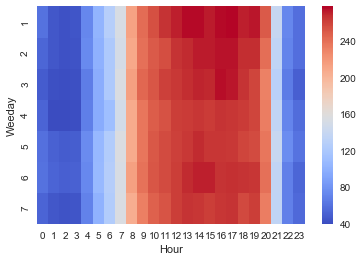

In [8]:
sns.heatmap(dayhour,cmap='coolwarm')

In [142]:
energy_dt.isnull().sum()

Row Labels              0
Hour                    0
Date-Hour               0
Month                   0
Year                    0
Sum/Win                 0
WeekNumber              0
Weeday                  0
Prior Period Temp C     0
Avg Temp C              0
Winter HDD (51 Base)    0
Summer CDD (51 Base)    0
Max Temp C              0
Dew C                   0
Humidity                0
Visibility (km)         0
Wind Dir                0
Wind Speed (km/h)       0
Gust Speed (km/h)       0
Precip (mm)             0
Conditions              0
Max kW                  0
dtype: int64

"Hour" and "Sum" are categorical values with integer values

In [358]:
trainDfDummies = pd.get_dummies(energy_dt, columns=['Hour','Sum/Win'])

In [359]:
trainDfDummies.columns

Index(['Row Labels', 'Date-Hour', 'Month', 'Year', 'WeekNumber', 'Weeday',
       'Prior Period Temp C', 'Avg Temp C', 'Winter HDD (51 Base)',
       'Summer CDD (51 Base)', 'Max Temp C', 'Dew C', 'Humidity',
       'Visibility (km)', 'Wind Dir', 'Wind Speed (km/h)', 'Gust Speed (km/h)',
       'Precip (mm)', 'Conditions', 'Max kW', 'Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23', 'Sum/Win_0', 'Sum/Win_1'],
      dtype='object')

In [435]:
ener = pd.get_dummies( trainDfDummies[['WeekNumber', 'Weeday', 'Winter HDD (51 Base)',
       'Summer CDD (51 Base)', 'Max Temp C', 'Dew C', 'Humidity',
       'Visibility (km)', 'Wind Dir', 'Wind Speed (km/h)', 'Gust Speed (km/h)',
       'Precip (mm)', 'Conditions','Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23', 'Sum/Win_0', 'Sum/Win_1']], drop_first = True )

In [436]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotenc = OneHotEncoder(categorical_features= [1])
x = onehotenc.fit_transform(ener).toarray()

In [437]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Model1: Linear Regression

In [289]:
#with all the features
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     445.5
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:27:44   Log-Likelihood:                -31981.
No. Observations:                6161   AIC:                         6.411e+04
Df Residuals:                    6088   BIC:                         6.460e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            18.2963      5.138      3.561      0.000       8.225      28.368
x2            20.3471      5.196      3.916      0.000      10.161      30.533
x3            16.4074      5.176      3.170      0.002       6.261      26.554
x4            18.3298      5.150      3.559      0.000       8.235      28.425
x5            23.9518      5.123      4.675      0.000      13.909      33.995
x6            24.0078      5.158      4.655      0.000      13.897      34.119
x7            16.8224      5.131      3.279      0.001       6.764      26.881
x8             0.6911      0.040     17.375      0.000       0.613       0.769
x9            -2.0709      1.306     -1.585      0.113      -4.632       0.490
x10            3.1486      1.647      1.912      0.056      -0.080       6.377
x11           63.0488     18.580      3.393      0.001      26.626      99.472
x12           59.9321     18.542      3.232      0.001      23.583      96.281
x13            2.2203      1.367      1.624      0.104      -0.460       4.901
x14            0.6117      0.743      0.824      0.410      -0.844       2.067
x15           -0.3107      0.183     -1.697      0.090      -0.670       0.048
x16           -0.5670      0.242     -2.343      0.019      -1.041      -0.093
x17           -0.5350      0.102     -5.246      0.000      -0.735      -0.335
x18            0.2895      0.182      1.588      0.112      -0.068       0.647
x19            3.0220      3.198      0.945      0.345      -3.246       9.290
x20         -106.1509      3.148    -33.722      0.000    -112.322     -99.980
x21         -107.1093      3.160    -33.893      0.000    -113.304    -100.914
x22         -113.1285      3.188    -35.487      0.000    -119.378    -106.879
x23         -110.4790      3.151    -35.057      0.000    -116.657    -104.301
x24          -83.7040      3.164    -26.454      0.000     -89.907     -77.501
x25          -51.9675      3.218    -16.150      0.000     -58.276     -45.659
x26          -32.8323      3.133    -10.481      0.000     -38.973     -26.691
x27           -4.4303      3.114     -1.423      0.155     -10.535       1.674
x28           44.7935      3.108     14.410      0.000      38.700      50.887
x29           70.1858      3.062     22.924      0.000      64.184      76.188
x30           75.5682      3.017     25.051      0.000      69.655      81.482
x31           76.5202      3.004     25.471      0.000      70.631      82.409
x32           78.6651      2.994     26.278      0.000      72.797      84.534
x33           78.0162      3.062     25.476      0.000      72.013      84.020
x34           76.5701      3.074     24.910      0.000      70.544      82.596
x35           74.2573      3.085     24.070      0.000      68.210      80.305
x36           77.6753      3.188     24.364      0.000      71.425      83.925
x3

In [291]:
#Predicting the test results
predictions

array([  47.37109512,  199.80548736,  172.98995231, ...,  197.89213651,
        101.83121597,   49.50018399])

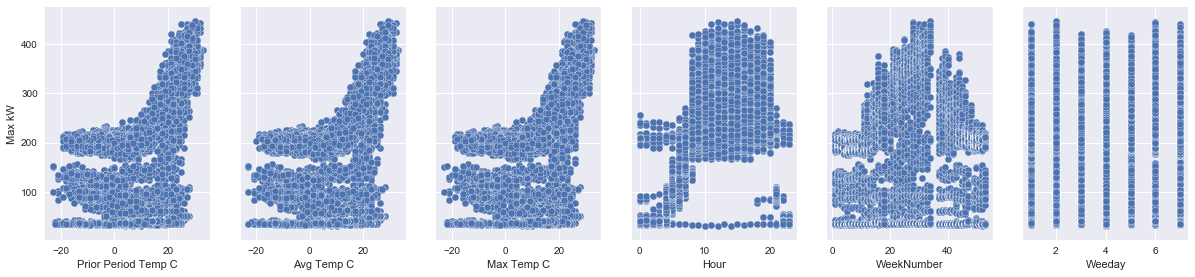

In [468]:
sns.pairplot(energy_dt, x_vars=['Prior Period Temp C', 'Avg Temp C','Max Temp C','Hour','WeekNumber', 'Weeday'], y_vars='Max kW',size=4, aspect=0.7)

All the temperature columns are highly correlated as the shapes of the curves look to be the same. Quantifying them with a heatmap would help.

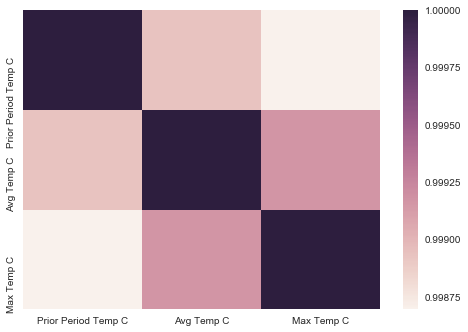

In [471]:
sns.set_context('notebook')
sns.heatmap(energy_dt[["Prior Period Temp C","Avg Temp C","Max Temp C"]].corr())

Hence,Any one feauture would help.

We can eliminate two features and see our R2 and Adjusted R2 are changing.

And we can repeat the same exercise for other features as well further.

In [445]:
#After removing Avg Temp and Prior Temp
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     458.0
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:20:54   Log-Likelihood:                -31983.
No. Observations:                6161   AIC:                         6.411e+04
Df Residuals:                    6090   BIC:                         6.459e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            20.9250      4.416      4.738      0.000      12.268      29.582
x2            22.9906      4.481      5.131      0.000      14.207      31.774
x3            19.1254      4.449      4.298      0.000      10.403      27.848
x4            20.9851      4.425      4.742      0.000      12.310      29.660
x5            26.5973      4.408      6.034      0.000      17.956      35.238
x6            26.7040      4.427      6.032      0.000      18.025      35.383
x7            19.4350      4.419      4.398      0.000      10.772      28.098
x8             0.6918      0.040     17.391      0.000       0.614       0.770
x9            52.6294     15.058      3.495      0.000      23.110      82.149
x10           70.2906     14.971      4.695      0.000      40.942      99.640
x11            2.3534      1.144      2.057      0.040       0.110       4.597
x12            0.7876      0.719      1.095      0.274      -0.623       2.198
x13           -0.3538      0.178     -1.989      0.047      -0.703      -0.005
x14           -0.5883      0.241     -2.445      0.015      -1.060      -0.117
x15           -0.5468      0.102     -5.371      0.000      -0.746      -0.347
x16            0.2830      0.182      1.552      0.121      -0.074       0.640
x17            2.9548      3.197      0.924      0.355      -3.312       9.222
x18         -105.5252      3.017    -34.977      0.000    -111.440     -99.611
x19         -106.5493      3.028    -35.190      0.000    -112.485    -100.614
x20         -112.5634      3.072    -36.639      0.000    -118.586    -106.541
x21         -109.9757      3.027    -36.326      0.000    -115.911    -104.041
x22          -83.0772      3.030    -27.419      0.000     -89.017     -77.138
x23          -51.3749      3.086    -16.650      0.000     -57.424     -45.326
x24          -32.0073      3.030    -10.563      0.000     -37.948     -26.067
x25           -3.2129      3.040     -1.057      0.291      -9.172       2.746
x26           46.5970      2.992     15.576      0.000      40.733      52.461
x27           71.8279      2.965     24.228      0.000      66.016      77.640
x28           77.2040      2.912     26.511      0.000      71.495      82.913
x29           77.8878      2.912     26.746      0.000      72.179      83.597
x30           79.8395      2.922     27.323      0.000      74.111      85.568
x31           79.2111      2.967     26.694      0.000      73.394      85.028
x32           77.7023      2.975     26.116      0.000      71.870      83.535
x33           75.1836      2.956     25.438      0.000      69.390      80.977
x34           78.1498      3.074     25.425      0.000      72.124      84.176
x35           80.3001      2.963     27.105      0.000      74.492      86.108
x36           80.6356      2.986     27.006      0.000      74.782      86.489
x3

As expected, There is no change in the Metrics.

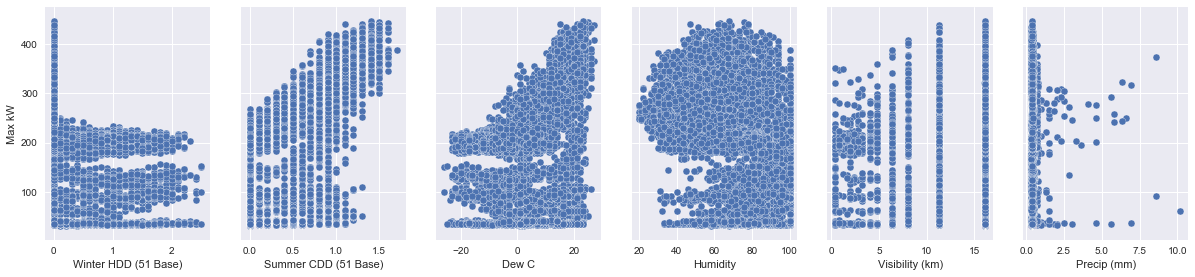

In [317]:
sns.pairplot(energy_dt, x_vars=['Winter HDD (51 Base)', 'Summer CDD (51 Base)', 'Dew C',
       'Humidity','Visibility (km)','Precip (mm)'], y_vars='Max kW', size=4, aspect=0.7)

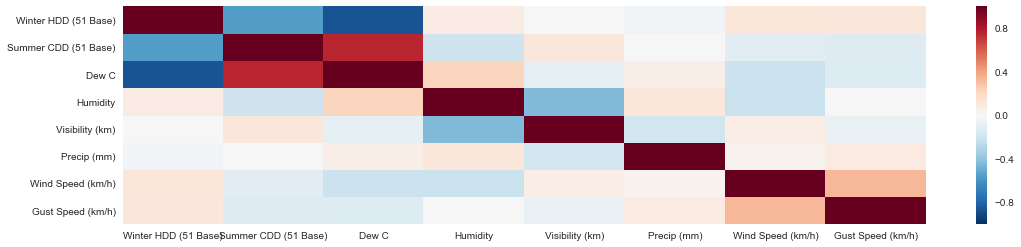

In [472]:
plt.figure(figsize=(18,4))
sns.heatmap(ener[['Winter HDD (51 Base)', 'Summer CDD (51 Base)', 'Dew C',
       'Humidity','Visibility (km)','Precip (mm)','Wind Speed (km/h)',
       'Gust Speed (km/h)']].corr())

There is no suspicious correlations(>90%).Hence No conclusions can be drawn from this plot.

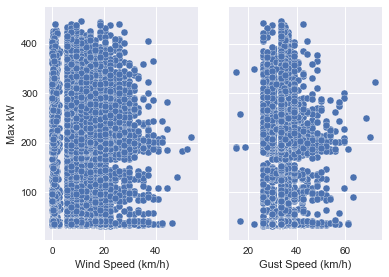

In [319]:
sns.pairplot(energy_dt, x_vars=['Wind Speed (km/h)',
       'Gust Speed (km/h)'], y_vars='Max kW', size=4, aspect=0.7)

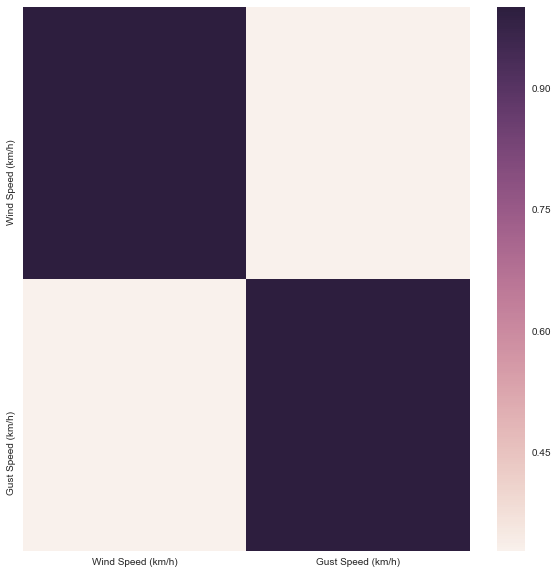

In [321]:
sns.heatmap(ener[['Wind Speed (km/h)',
       'Gust Speed (km/h)']].corr())

In [446]:
#After removing "Weeday" feature
#with all the features
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     458.0
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:21:17   Log-Likelihood:                -31983.
No. Observations:                6161   AIC:                         6.411e+04
Df Residuals:                    6090   BIC:                         6.459e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            20.9250      4.416      4.738      0.000      12.268      29.582
x2            22.9906      4.481      5.131      0.000      14.207      31.774
x3            19.1254      4.449      4.298      0.000      10.403      27.848
x4            20.9851      4.425      4.742      0.000      12.310      29.660
x5            26.5973      4.408      6.034      0.000      17.956      35.238
x6            26.7040      4.427      6.032      0.000      18.025      35.383
x7            19.4350      4.419      4.398      0.000      10.772      28.098
x8             0.6918      0.040     17.391      0.000       0.614       0.770
x9            52.6294     15.058      3.495      0.000      23.110      82.149
x10           70.2906     14.971      4.695      0.000      40.942      99.640
x11            2.3534      1.144      2.057      0.040       0.110       4.597
x12            0.7876      0.719      1.095      0.274      -0.623       2.198
x13           -0.3538      0.178     -1.989      0.047      -0.703      -0.005
x14           -0.5883      0.241     -2.445      0.015      -1.060      -0.117
x15           -0.5468      0.102     -5.371      0.000      -0.746      -0.347
x16            0.2830      0.182      1.552      0.121      -0.074       0.640
x17            2.9548      3.197      0.924      0.355      -3.312       9.222
x18         -105.5252      3.017    -34.977      0.000    -111.440     -99.611
x19         -106.5493      3.028    -35.190      0.000    -112.485    -100.614
x20         -112.5634      3.072    -36.639      0.000    -118.586    -106.541
x21         -109.9757      3.027    -36.326      0.000    -115.911    -104.041
x22          -83.0772      3.030    -27.419      0.000     -89.017     -77.138
x23          -51.3749      3.086    -16.650      0.000     -57.424     -45.326
x24          -32.0073      3.030    -10.563      0.000     -37.948     -26.067
x25           -3.2129      3.040     -1.057      0.291      -9.172       2.746
x26           46.5970      2.992     15.576      0.000      40.733      52.461
x27           71.8279      2.965     24.228      0.000      66.016      77.640
x28           77.2040      2.912     26.511      0.000      71.495      82.913
x29           77.8878      2.912     26.746      0.000      72.179      83.597
x30           79.8395      2.922     27.323      0.000      74.111      85.568
x31           79.2111      2.967     26.694      0.000      73.394      85.028
x32           77.7023      2.975     26.116      0.000      71.870      83.535
x33           75.1836      2.956     25.438      0.000      69.390      80.977
x34           78.1498      3.074     25.425      0.000      72.124      84.176
x35           80.3001      2.963     27.105      0.000      74.492      86.108
x36           80.6356      2.986     27.006      0.000      74.782      86.489
x3

Adjusted R2 decreased by 0.001. Hence,It's not advisable to eliminate this feature.Rather let's encode it and see if the R2 is improved.

In [365]:
#After adding "Weeday" feature again and encoding it
#with all the features
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     482.7
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        12:55:26   Log-Likelihood:                -32001.
No. Observations:                6161   AIC:                         6.414e+04
Df Residuals:                    6094   BIC:                         6.459e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            50.9861      7.362      6.925      0.000      36.553      65.419
x2            49.7550      7.300      6.815      0.000      35.444      64.066
x3            49.6320      8.720      5.692      0.000      32.538      66.726
x4             0.6860      0.040     17.148      0.000       0.608       0.764
x5           122.0244      3.607     33.834      0.000     114.954     129.094
x6            -0.9159      0.668     -1.372      0.170      -2.225       0.393
x7             0.0652      0.699      0.093      0.926      -1.304       1.435
x8            -0.1884      0.173     -1.088      0.276      -0.528       0.151
x9             0.3462      0.289      1.199      0.231      -0.220       0.912
x10           -0.5186      0.239     -2.166      0.030      -0.988      -0.049
x11           -0.5580      0.102     -5.474      0.000      -0.758      -0.358
x12            0.3019      0.183      1.654      0.098      -0.056       0.660
x13            3.3851      3.203      1.057      0.291      -2.894       9.665
x14         -106.1756      2.913    -36.446      0.000    -111.887    -100.465
x15         -107.3174      2.919    -36.760      0.000    -113.040    -101.594
x16         -112.9589      2.960    -38.159      0.000    -118.762    -107.156
x17         -110.8414      2.932    -37.804      0.000    -116.589    -105.094
x18          -83.8833      2.928    -28.646      0.000     -89.624     -78.143
x19          -51.9147      2.972    -17.470      0.000     -57.740     -46.089
x20          -32.4929      2.911    -11.161      0.000     -38.200     -26.786
x21           -3.5305      2.907     -1.215      0.225      -9.228       2.167
x22           46.9944      2.839     16.555      0.000      41.430      52.559
x23           72.5743      2.804     25.886      0.000      67.078      78.070
x24           77.6536      2.765     28.081      0.000      72.233      83.075
x25           78.1433      2.789     28.013      0.000      72.675      83.612
x26           79.8599      2.814     28.379      0.000      74.343      85.376
x27           78.9607      2.874     27.473      0.000      73.327      84.595
x28           77.2662      2.895     26.693      0.000      71.592      82.941
x29           74.5717      2.870     25.982      0.000      68.945      80.198
x30           77.4450      2.989     25.906      0.000      71.585      83.305
x31           80.0000      2.862     27.951      0.000      74.389      85.611
x32           80.8578      2.864     28.234      0.000      75.244      86.472
x33           86.7227      2.809     30.877      0.000      81.217      92.229
x34           67.8407      2.841     23.881      0.000      62.272      73.410
x35          -28.7653      2.840    -10.130      0.000     -34.332     -23.199
x36          -91.9104      2.805    -32.769      0.000     -97.409     -86.412
x3

### Model2: Random Forest

In [443]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1200, random_state = 42)

# Train the model on training data
rf.fit(x_train, y_train);

In [444]:
y_pred_rf=rf.predict(x_test)

In [419]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [495]:
y_pred_linear=predictions

In [496]:
mean_absolute_percentage_error(y_test,y_pred_linear)

32.551818134654802

In [433]:
mean_absolute_percentage_error(y_test,y_pred_rf)

13.682056679207241

In [518]:
from sklearn.metrics import r2_score
coefficient_of_dermination_rf = r2_score(y_test, y_pred_rf)
coefficient_of_dermination_rf

0.93735844534901824

In [517]:
from sklearn.metrics import r2_score
coefficient_of_dermination_lin = r2_score(y_test, predictions)
coefficient_of_dermination_lin

0.83617610653543939

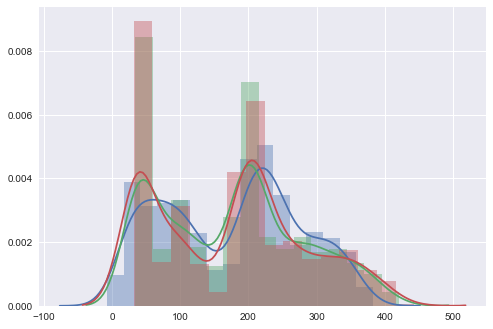

In [481]:
sns.distplot(predictions)
sns.distplot(y_pred_rf)
sns.distplot(y_test)

The distribution plots of the predicted values of the two regressors and the actual values are almost converging.

In [400]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(['WeekNumber', 'Weeday','Winter HDD (51 Base)',
       'Summer CDD (51 Base)', 'Max Temp C', 'Dew C', 'Humidity',
       'Visibility (km)', 'Wind Dir', 'Wind Speed (km/h)', 'Gust Speed (km/h)',
       'Precip (mm)', 'Conditions','Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23', 'Sum/Win_0', 'Sum/Win_1'], importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Gust Speed (km/h)    Importance: 0.3
Variable: Conditions           Importance: 0.08
Variable: Wind Speed (km/h)    Importance: 0.07
Variable: Visibility (km)      Importance: 0.05
Variable: Hour_4               Importance: 0.05
Variable: Hour_5               Importance: 0.04
Variable: Hour_6               Importance: 0.04
Variable: Hour_7               Importance: 0.04
Variable: Hour_8               Importance: 0.04
Variable: Sum/Win_1            Importance: 0.04
Variable: Hour_9               Importance: 0.03
Variable: Hour_10              Importance: 0.03
Variable: Hour_11              Importance: 0.02
Variable: Precip (mm)          Importance: 0.01
Variable: Hour_1               Importance: 0.01
Variable: WeekNumber           Importance: 0.0
Variable: Weeday               Importance: 0.0
Variable: Winter HDD (51 Base) Importance: 0.0
Variable: Summer CDD (51 Base) Importance: 0.0
Variable: Max Temp C           Importance: 0.0
Variable: Dew C                Importance: 0.0